[[ 4.13742496  3.89889877 10.7950601  -7.87052522  0.          1.45301051]
 [ 1.48222427  0.28737811 10.58336745 -7.71201829  0.          1.46563452]
 [ 1.48405814  0.27632425 10.64479886 -7.77202008  0.          1.45535093]
 [ 3.6446793   4.07692166 11.20849552 -8.35969153  0.          1.50042938]
 [ 2.49753128  5.79617222  9.62367314 -6.71375848  0.          1.26789726]
 [ 5.31545368  0.59152929 10.62629345 -7.76912496  0.          1.42903703]
 [ 0.94680646  4.35344196 11.48041092 -8.68861229  0.          1.50075633]
 [ 2.29663616  3.78969419 10.92289651 -7.94331152  0.          1.4436201 ]
 [ 3.67672877  5.07704347 11.09929976 -8.24936343  0.          1.43260815]
 [ 2.44839233  1.73574321 10.90404763 -7.98626238  0.          1.40192358]
 [ 2.84108918  3.05747932 11.33612319 -8.48204711  0.          1.41549276]
 [ 1.66473287  5.68821176  9.33819587 -6.44586086  0.          1.24430471]
 [ 2.39381035  0.67089623 10.79118878 -8.05461873  0.          1.43967063]
 [ 1.492844    2.86904489

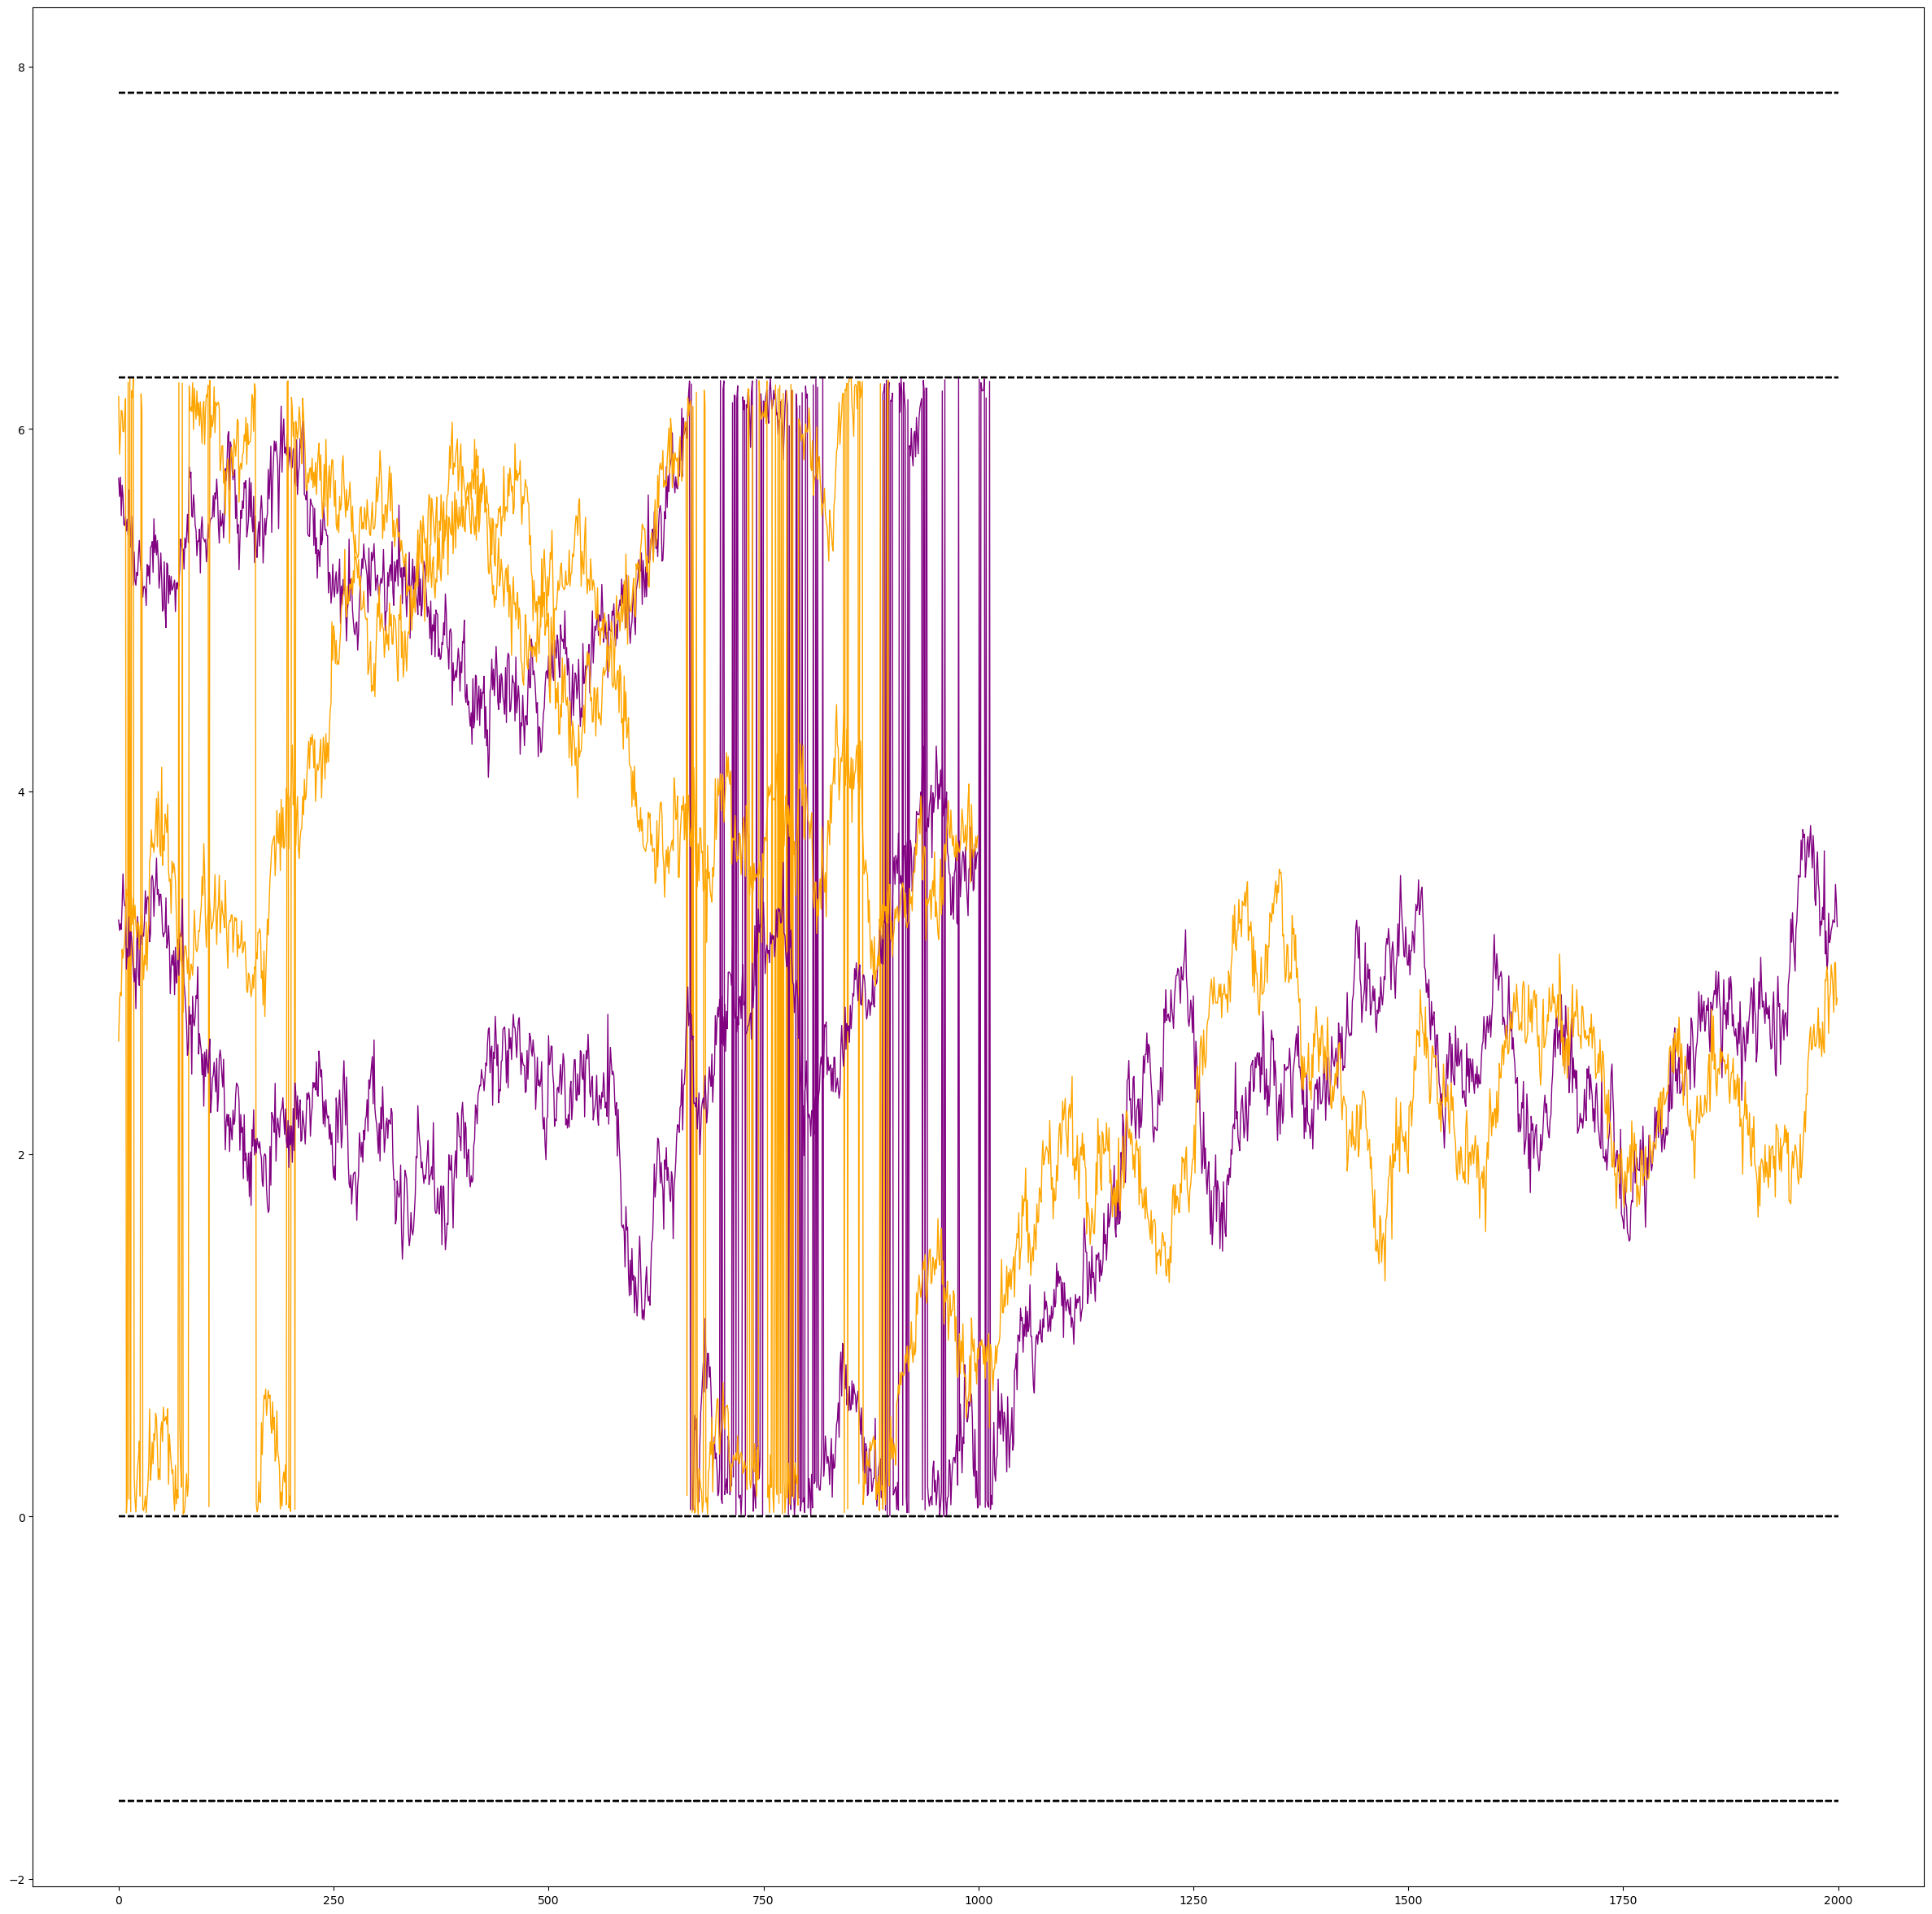

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.ndimage
import sys
from scipy.optimize import minimize
from scipy.special import gammaln
import time
import concurrent.futures
import pickle
import gzip
import plotly
import os

folder_name = 'results/test/'

# file_name = 'two_circles_GW_rand5_start_0_estDir' #CHANGED
# file_path = os.path.join(folder_name, file_name)
# with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
#     data = np.load(f, allow_pickle=True)

# estDir4,  params4, llvals4 = data['estDir'],data['params'],data['llvals']

# file_name = 'two_circles_GW_rand15_start_3_estDir' #CHANGED
# file_path = os.path.join(folder_name, file_name)
# with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
#     data = np.load(f, allow_pickle=True)


# estDir3,  params3, llvals3 = data['estDir'],data['params'],data['llvals']


# file_name = 'two_circles_GW_rand5_start_2_estDir' #CHANGED
# file_path = os.path.join(folder_name, file_name)
# with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
#     data = np.load(f, allow_pickle=True)


# estDir2, params2, llvals2 = data['estDir'],  data['params'],data['llvals']


# name = 'two_circles_GW_rand19_start_1_estDir' #CHANGED
# file_path = os.path.join(folder_name, file_name)
# with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
#     data = np.load(f, allow_pickle=True)
# estDir1,  params1, llvals1 = data['estDir'],data['params'],data['llvals']




# file_name = 'two_circles_GW_rand10_start_0_estDir' #CHANGED
# #file_name = 'twocircles_testhybrid_rand49_start_0_estDir'
# file_path = os.path.join(folder_name, file_name)
# with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
#     data = np.load(f, allow_pickle=True)

# #estDir, estDirStd, totnegLogL, params, llvals = data['estDir'], data['estDirStd'],  data['totnegLogL'],data['params'],data['llvals']
# #If not using the final one with fewer values saved:
# estDir0,  params0, llvals0 = data['estDir'],  data['params'],data['llvals']
# print(llvals0)

file_name = 'best_estDir'
file_path = os.path.join(folder_name, file_name)
with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
    data = np.load(f, allow_pickle=True)

llvals, estDir, params = data['llvals'], data['preddir'],data['result']

#If not using the final one with fewer values saved:
#estDir, estDirStd,totNegLogL, params, llvals = data['estDir'], data['estDirStd'],data['totnegLogL'], data['params'],data['llvals']
print(params)



plt.figure(figsize=(30,30))
plt.clf()
# estDir%(2.*np.pi)
# estDir = 2*np.pi - estDir
#DDp = (DD+2.*DDstd)
#DDm = (DD-2.*DDstd)
for i in range(10):
    plt.figure
    si = 2000*i
    ei = 2000*(i+1)
    plt.plot(estDir[si:ei,0], '-', color='purple', lw=1)
    #plt.plot(DDp[si:ei,0], '-', color='blue', lw=0.5)
    #plt.plot(DDm[si:ei,0], '-', color='blue', lw=0.5)
    plt.plot(estDir[si:ei,1], '-', color='orange', lw=1)
    #plt.plot(DDp[si:ei,1], '-', color='red', lw=0.5)
    #plt.plot(DDm[si:ei,1], '-', color='red', lw=0.5)
    #plt.plot(headangle[si:ei,0], '-', color='red', lw=1)
    plt.plot([0,2000], [0, 0], '--', color='black')
    plt.plot([0,2000], [-np.pi/2., -np.pi/2.], '--', color='black')
    plt.plot([0,2000], [2.*np.pi, 2.*np.pi], '--', color='black')
    plt.plot([0,2000], [2.*np.pi+np.pi/2., 2.*np.pi+np.pi/2.], '--', color='black')
#plt.savefig('%s_lvm_final_decoding.pdf'%(name[:(-4)]))
print(len(params))
# print(totNegLogL)

file_name = 'twocirclesseparableGW' #CHANGED
file_path = os.path.join(folder_name, file_name)
with gzip.open('%s.pkl.gz'%file_path, 'rb') as f:
    data = np.load(f, allow_pickle=True)

#Extract data

hd_sim = data['hd_train']
allocation = data['allocation']
#hd_test = data['hd_test']

S = np.array(data['S_train']) #neuron data
#S_test = np.array(data['S_test'])
#print(S_train.shape, hd_train.shape, params.shape)
#print(DD.shape)
N=len(S[:,0])
# Nparams= len(results[:,1])
print(N)
# print(len(params[-N:,:]))
# print(params[-N:,:])

In [72]:
totmistake = 0
print(params.shape)
for i in range((params.shape[0])):

    print(params[i,4]- allocation[i])
    totmistake += params[i,4]- allocation[i]

print("total amount wrong: ",totmistake)

(50, 6)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
total amount wrong:  0.0


In [73]:
print(params.shape)
for i in range(N):
    print((params[i,:]))

(50, 6)
[ 4.13742496  3.89889877 10.7950601  -7.87052522  0.          1.45301051]
[ 1.48222427  0.28737811 10.58336745 -7.71201829  0.          1.46563452]
[ 1.48405814  0.27632425 10.64479886 -7.77202008  0.          1.45535093]
[ 3.6446793   4.07692166 11.20849552 -8.35969153  0.          1.50042938]
[ 2.49753128  5.79617222  9.62367314 -6.71375848  0.          1.26789726]
[ 5.31545368  0.59152929 10.62629345 -7.76912496  0.          1.42903703]
[ 0.94680646  4.35344196 11.48041092 -8.68861229  0.          1.50075633]
[ 2.29663616  3.78969419 10.92289651 -7.94331152  0.          1.4436201 ]
[ 3.67672877  5.07704347 11.09929976 -8.24936343  0.          1.43260815]
[ 2.44839233  1.73574321 10.90404763 -7.98626238  0.          1.40192358]
[ 2.84108918  3.05747932 11.33612319 -8.48204711  0.          1.41549276]
[ 1.66473287  5.68821176  9.33819587 -6.44586086  0.          1.24430471]
[ 2.39381035  0.67089623 10.79118878 -8.05461873  0.          1.43967063]
[ 1.492844    2.86904489 10.03

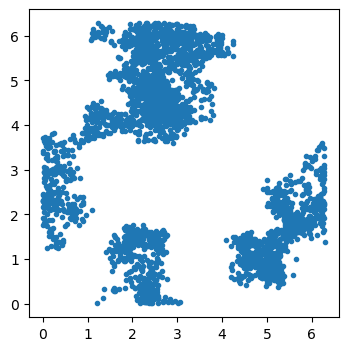

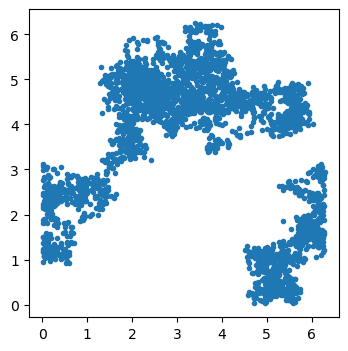

In [74]:
plt.figure(figsize=(4,4))
plt.plot(estDir[:,0], hd_sim[0,:], '.')
#plt.plot(np.transpose(hd_sim)[1:10])

# plt.figure(figsize=(4,4))
# plt.plot(estDir[:,0], hd_sim[1,:], '.')

# plt.figure(figsize=(4,4))
# plt.plot(estDir[:,1], hd_sim[0,:], '.')

plt.figure(figsize=(4,4))
plt.plot(estDir[:,1], hd_sim[1,:], '.')


In [ ]:
#Look at llvals:



In [39]:

#Necessary functions to use preddir for predicted directions:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def CircleDist(angles,D):
    dx = abs(angles-D)
    dx = np.minimum(dx, 2 * np.pi - dx)
    return dx

def ToroidalDist(angles, D): #CHANGED
    D = np.array(D)
    theta = angles[0]
    phi = angles[1]
    #print("tehta, phi, D: ", theta, phi, D)
    
    dx = abs(D[:, 0] - theta)
    dy = abs(D[:, 1] - phi)
    dx = np.minimum(dx, 2 * np.pi - dx)
    dy = np.minimum(dy, 2 * np.pi - dy)
    #print(dx,dy)
    distances = np.sqrt(dx**2 + dy**2)
    return distances

def getLambdaTwoCircles(a,D):
        tc_preftheta = a[0] % (2.*np.pi) # Angles
        tc_prefphi = a[1] % (2.*np.pi)
        tc_beta = a[2] # This is a weight of the gaussian bumb
        tc_h = a[3] # This is background fire rate
        tc_g= sigmoid(a[4]) # Which circles does neuron belong to?
        tc_sigma = np.pi/2 ### note, HYPERPARAMETER, also the width of the bumb or variance of the normal dist. 
        
        if(len(a)>5):
            tc_sigma = a[5]
        distsqrds1 = CircleDist(tc_preftheta, D[:,0])
        distsqrds2 = CircleDist(tc_prefphi, D[:,1])
        bump1 = tc_beta * np.exp(-distsqrds1**2 / (2*tc_sigma**2))
        bump2 = tc_beta * np.exp(-distsqrds2**2 / (2*tc_sigma**2))
        bump2d = tc_h + bump1 * tc_g + bump2 * (1-tc_g)
        return bump2d

def meanandstd(points):
    cpoints = np.zeros(2)
    cpoints[0] = np.arctan2(np.sum(np.sin(points[:,0])), np.sum(np.cos(points[:,0])))
    cpoints[1] = np.arctan2(np.sum(np.sin(points[:,1])), np.sum(np.cos(points[:,1])))
    def mindist(a):
        return(np.mean(ToroidalDist(a, points)))
        #return(np.mean(CircleDist(a[0], points[0]))+ np.mean(CircleDist(a[1], points[1])))
    res = minimize(mindist, cpoints+0.01, method='L-BFGS-B')
    response = (res.x, np.sqrt(res.fun))
    #print("meanandstd response: ",response)
    return response


def getpreddir(params, S):
    T= len(S[0,:])
    N = len(S[:,0])
    def getlikelihood(Dtry):
        logl = np.zeros(T)
        for i in range(N-1):
            H = getLambdaTwoCircles(params[i,:], Dtry)
            logl += (S[i,:]*H - np.exp(H) - gammaln(S[i,:]+1))
        return(np.exp(logl)) 

    
    T = S.shape[1]  # Number of time steps based on provided length of data S
    particles = np.random.uniform(0, 20*np.pi, size=(N, T, 2)) % (2.*np.pi)
    Dc = np.zeros((T, 2))
    Dcstd = np.zeros(T)
    NX = 3
    for xxx in range(NX):
        particles = particles + np.random.normal(0, np.pi/4, size=(N, T, 2))
        particles %= (2*np.pi)

        likelihoods = np.zeros((N, T))
        for i in range(N):
            Dt = particles[i,:,:]
            likelihoods[i,:] = getlikelihood(Dt)
        #output_file.write(str(np.exp(likelihoods)))
        #likelihoods = np.exp(likelihoods)
        
        normfact = np.sum(likelihoods, axis=0)
        #print(" \n average likelihood: ", np.mean(likelihoods))
        #normfact[normfact == 0] = 1  # Avoid division by zero
        weights = likelihoods  / normfact[np.newaxis, :]

        for t in range(T):
            inds = np.random.choice(np.arange(N), size=N, p=weights[:,t])
            particles[:,t,:] = particles[inds,t,:]
            if(xxx == NX-1):  
                angs = particles[:,t,:] + 0.
                Dc[t,:], Dcstd[t] = meanandstd(angs)
    return(Dc, Dcstd)

In [6]:
#Testing using the testdata:

print(hd_test.shape, S_test.shape)
estDirTest0, estDirTest1 = getpreddir(params, S_test)


(2, 600) (80, 600)


(600, 2)
(2, 600) (2, 3000)


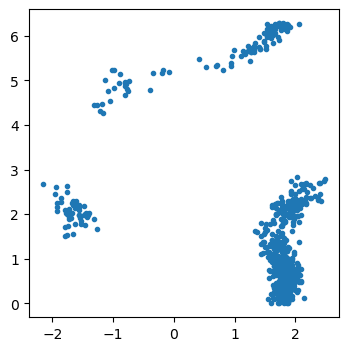

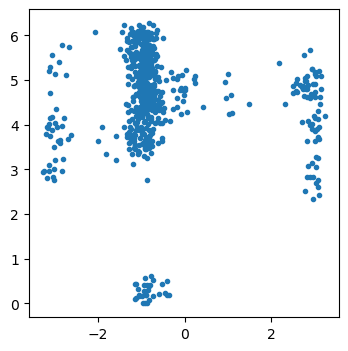

In [7]:
print(estDirTest0.shape)
print(hd_test.shape, hd_train.shape)
plt.figure(figsize=(4,4))
plt.plot(estDirTest0[:,0], hd_test[0,:], '.')
#plt.plot(np.transpose(hd_sim)[1:10])

plt.figure(figsize=(4,4))
plt.plot(estDirTest0[:,1], hd_test[1,:], '.')